In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib
# matplotlib.rcParams['figure.figsize'] = (20,10)

Data from kaggel

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('price')['price'].agg('count').max()

310

In [5]:
df[df['price'] == 310]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1599,Super built-up Area,Ready To Move,Sarjapur Road,4 BHK,Vaunei,4111,4.0,1.0,310.0
2850,Super built-up Area,18-May,Hebbal,4 BHK,SNontle,3067,4.0,1.0,310.0
4429,Built-up Area,Ready To Move,Murugeshpalya,4 BHK,IBaveen,3100,4.0,2.0,310.0
5058,Super built-up Area,Ready To Move,Malleshwaram,3 BHK,Sariaat,2215,4.0,1.0,310.0
5430,Super built-up Area,Ready To Move,Dollar Scheme Colony,4 BHK,Vacesi,3563,6.0,1.0,310.0
6406,Super built-up Area,Ready To Move,Hebbal Kempapura,4 BHK,GonumPl,3900,5.0,NaN,310.0
6488,Plot Area,Ready To Move,Basaveshwara Nagar,5 Bedroom,NaN,2400,4.0,1.0,310.0
6727,Built-up Area,Ready To Move,Dollar Scheme Colony,4 BHK,Vacesi,3463,6.0,0.0,310.0
7811,Plot Area,Ready To Move,KR Puram,5 Bedroom,Skdia A,3657,5.0,NaN,310.0
8332,Plot Area,Ready To Move,Sanjay nagar,3 Bedroom,NaN,2400,3.0,3.0,310.0


In [6]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

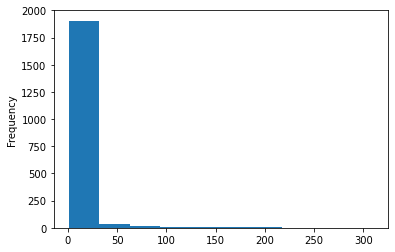

In [7]:
df['price'].value_counts().plot(kind='hist');

In [8]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df1 = df.drop(['availability','society','balcony','area_type'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
type(df1['size'].unique()[0])

str

In [12]:
# df1['size'] = df1['size'].map(lambda x: x.split(' ')[0])
# .map(lambda x: print(type(int(x.split(' ')[0]))))
# df1['size'] = df1['size'].filter(lambda x: np.isnan(x) == False, df1['size'])

# result = list(filter(lambda x: np.isnan(x) == False, df1['size']))

# result

In [13]:
# df1['size'] = df1['size'].fillna(df1['size'].median())
df1['bath'] = df1['bath'].fillna(df1['bath'].median())
df1.isna().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [14]:
df2 = df1.dropna()
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df2.shape

(13303, 5)

In [16]:
df2['bhk'] = df2['size'].apply(lambda x:int(x.split(' ')[0]))

/tmp/ipykernel_1894/2198080314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [17]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [19]:
df2[df2.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
	try:
		float(x)
	except:
		return False
	return True

In [22]:
df2[~df2['total_sqft'].apply(is_float)].head(50)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [23]:
def convert_sqrt_to_num(x):
	tokens = x.split('-')
	if len(tokens) == 2:
		return (float(tokens[0])+float(tokens[1]))/2
	try:
		return float(x)
	except:
		return None	
		

In [24]:
convert_sqrt_to_num('2100')

2100.0

In [25]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqrt_to_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df3.loc[1743]

location      Hosa Road
size              3 BHK
total_sqft          NaN
bath                3.0
price             115.0
bhk                   3
Name: 1743, dtype: object

In [27]:
df4 = df3.copy()
df4['price_per_sqrt'] = df4['price']*100000/df4['total_sqft']

df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
len(df4['location'].unique())

1304

In [29]:
df4.location = df4.location.apply(lambda x:x.strip())

location_stat = df4.location.value_counts()
# location_stat
df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [30]:
len(location_stat[location_stat<=10])

1052

In [31]:
location_less_than_10 = location_stat[location_stat<=10]
location_less_than_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [32]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df4.location.unique())

242

In [33]:
df4[df4['location'] == 'other']


,location,size,total_sqft,bath,price,bhk,price_per_sqrt
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
18,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
25,other,3 BHK,1250.0,3.0,56.00,3,4480.000000
42,other,1 BHK,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...,...
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [34]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
len(df4[df4.total_sqft/df4.bhk<300])

744

In [36]:
df4.shape

(13303, 7)

In [37]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12559, 7)

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrt)
        std = np.std(subdf.price_per_sqrt)
        reduced_df = subdf[(subdf.price_per_sqrt > (m-std))
                           & (subdf.price_per_sqrt <= (m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out


df6 = remove_pps_outliers(df5)
df6.shape


(10286, 7)

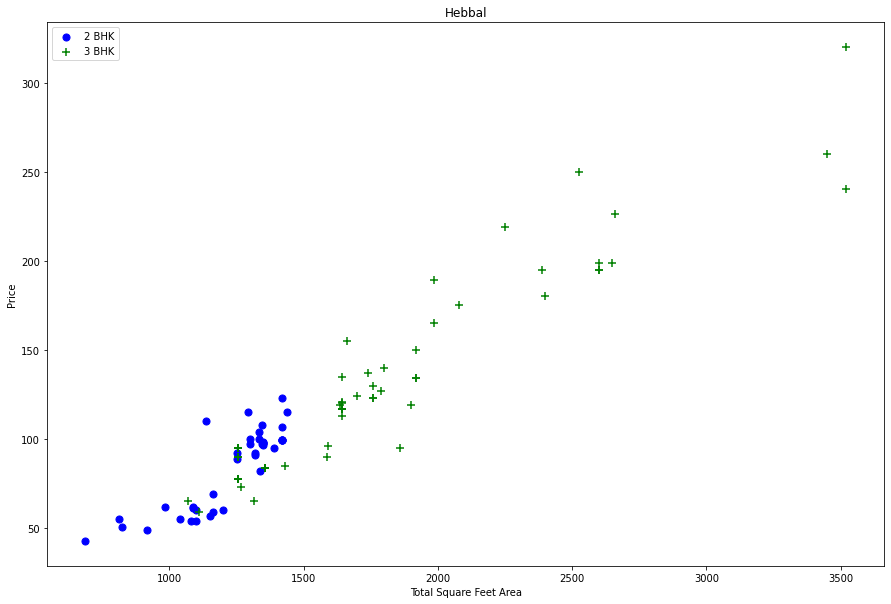

In [39]:
import matplotlib


def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+',
                color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()


plot_scatter_chart(df6, 'Hebbal')


we should remove properties where for some location, the price of(for example) 3 bedroom apartment is less than 2 bedroom apartment (with same sqrft area). What we will do is for a given location, we will build dictionary of status per bhk, etc.

{
	'1': {
		'mean':4000,
		'std': 2000,
		'count': 34
	},
	'2': {
		'mean':4300,
		'std': 2300,
		'count': 22
	}
}

Now we can remove those 2 BHK apartment whose price_per_sqrt is less than mean price_per_sqrt of 1 BHK apartment

In [40]:
df6.shape[0]

10286

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_status = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_status[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqrt),
                'std': np.std(bhk_df.price_per_sqrt),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_status.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices, bhk_df[bhk_df.price_per_sqrt < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')


In [42]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7353, 7)

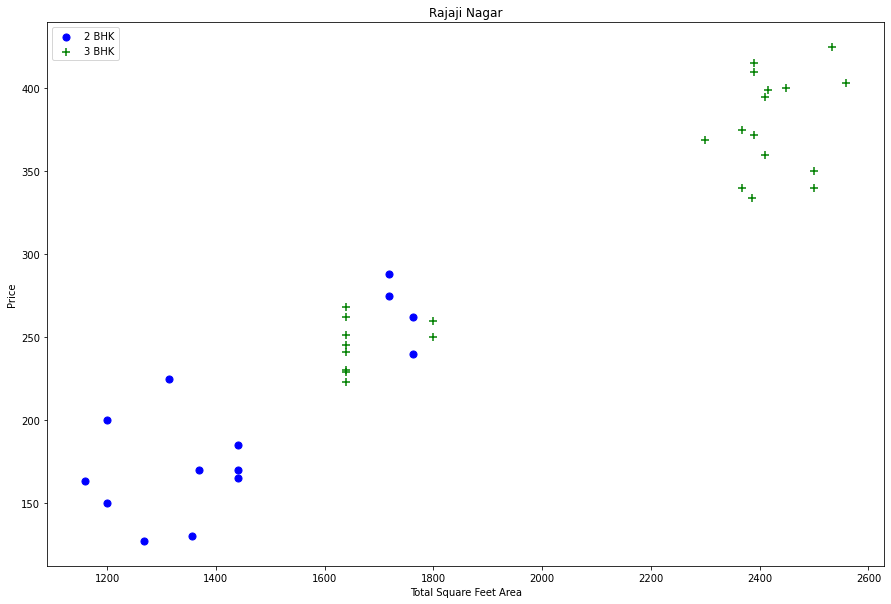

In [43]:
plot_scatter_chart(df7, 'Rajaji Nagar')


Text(0, 0.5, 'Count')

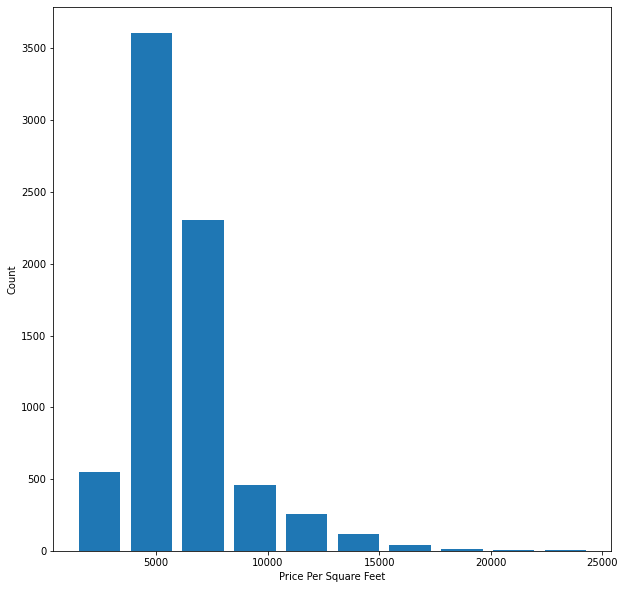

In [44]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
plt.hist(df7.price_per_sqrt, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [45]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [46]:
df7[df7.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8530,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8619,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9352,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9683,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

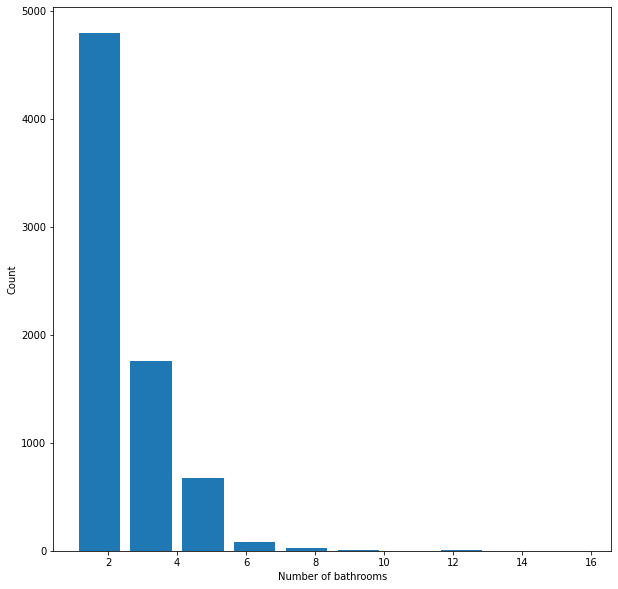

In [47]:
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [48]:
df7[df7.bath > df7.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8455,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [49]:
df8 = df7[df7.bath < df7.bhk + 2]
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10277,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10278,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10281,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10282,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [50]:
df9 = df8.drop(['size','price_per_sqrt'], axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [51]:
len(df9.location.unique())

242

In [52]:
dummies_location = pd.get_dummies(df9.location)
dummies_location

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df10 = pd.concat([df9,dummies_location.drop('other',axis='columns')],axis='columns')
df10.shape

(7275, 246)

In [54]:
df11 = df10.drop('location',axis='columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11.shape

(7275, 245)

In [56]:
X = df11.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [58]:
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8300702721040207

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
lr_cv = cross_val_score(lr_clf, X, y, cv=cv)
lr_cv = np.mean(lr_cv)
lr_cv


0.8375015852324115

In [61]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridSearchCV(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

    for algo_name, config in algos.items():
        gs = GridSearchCV(
            config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_param": gs.best_params_,
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_param'])


find_best_model_using_gridSearchCV(X, y)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_param
0,linear_regression,0.837502,{'normalize': False}
1,lasso,0.712224,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.728725,"{'criterion': 'mse', 'splitter': 'random'}"


In [62]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [67]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

In [69]:
X.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     8,     9,
               10,
            ...
            10266, 10267, 10269, 10271, 10275, 10277, 10278, 10281, 10282,
            10285],
           dtype='int64', length=7275)

In [73]:
np.where(X.index == 10275)[0][0]

7269

In [75]:
len(X.columns)

244

In [74]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [76]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [77]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.51389235970133

In [84]:
predict_price('1st Phase JP Nagar',1000,2,3)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.66258118229361

In [83]:
predict_price('Indira Nagar',1000,3,3)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


189.4510800110446

In [85]:
import pickle
with open('bngaluru_home_price_model.pickel','wb') as f:
  pickle.dump(lr_clf,f)

In [86]:
import json

columns = {
	'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
  f.write(json.dumps(columns))